# Phase 3 Data Science Report

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [3]:
# read in all the batches
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [4]:
# convert the batches to dataframes
df1 = pd.DataFrame(batch1[b'data'])
df2 = pd.DataFrame(batch2[b'data'])
df3 = pd.DataFrame(batch3[b'data'])
df4 = pd.DataFrame(batch4[b'data'])
df5 = pd.DataFrame(batch5[b'data'])
test_df = pd.DataFrame(test_batch[b'data'])

In [5]:
# print the shape of each dataframe
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(test_df.shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [6]:
# combine the dataframes into one
df_combined = pd.concat([df1, df2, df3, df4, df5])

In [7]:
# reshape df_combined to 32x32x3
df_combined = df_combined.values.reshape(-1, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [8]:
# combine all the labels into one
labels = np.concatenate([batch1[b'labels'], batch2[b'labels'], batch3[b'labels'], batch4[b'labels'], batch5[b'labels']])


In [9]:
# make a new dataframe with the labels
df_labels = pd.DataFrame(labels)
df_labels['labels'] = labels
df_labels['image'] = df_combined

In [10]:
# # make a new dataframe with df1 and its labels
# df_labels = pd.DataFrame(batch1[b'labels'])
# df_labels['label'] = batch1[b'labels']
# df_labels['image'] = df_combined


In [11]:
# make a dictionary with the key being the label of the image and the value being the index of the image from df
label_dict = {}
for i in range(len(df_labels)):
    if df_labels['labels'][i] in label_dict:
        label_dict[df_labels['labels'][i]].append(i)
    else:
        label_dict[df_labels['labels'][i]] = [i]



In [12]:
# sort dictionary by key
label_dict = dict(sorted(label_dict.items()))


Label:  0


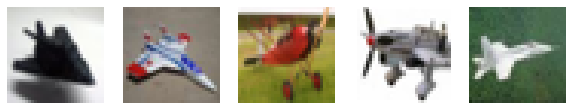

Label:  1


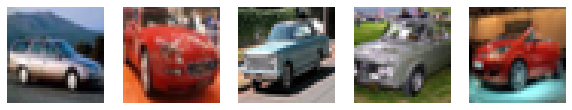

Label:  2


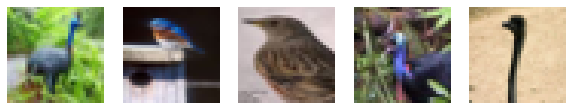

Label:  3


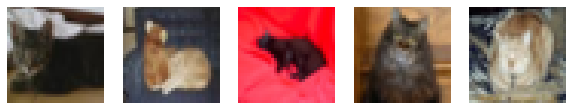

Label:  4


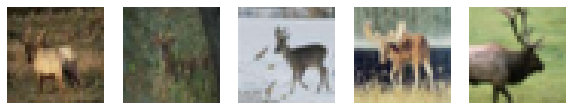

Label:  5


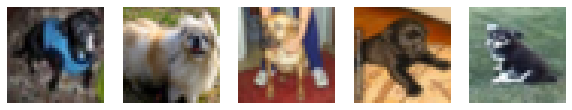

Label:  6


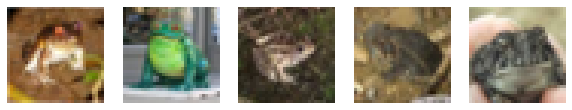

Label:  7


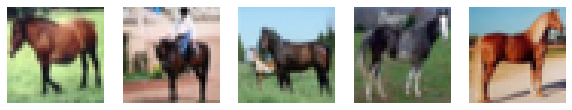

Label:  8


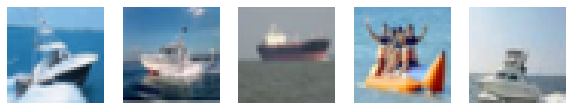

Label:  9


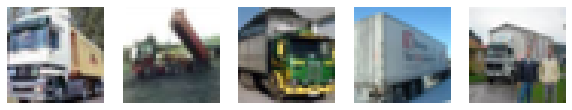

In [13]:
# render the 5 images for each key in the dictionary
for key in label_dict:
    plt.figure(figsize=(10,10))
    print("Label: ", key)
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(df_combined[label_dict[key][i]])
        plt.axis('off')
    plt.show()

### Decided to pick label 5 which is a dog

## Data Processing

# Introduction

In [15]:
print("hi")

hi


# Model Process

# Model Performance

# Conclusion

# References

1. [Learning Multiple Layers of Features from Tiny Images](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.